In [1]:
import intdiff as id

sol = id.getTFScreeningFunction()

Solved in 7 iterations, number of nodes 100014, maximum relative residual 6.88e-04.
0
True


In [2]:
import numpy as np
import scipy.interpolate as inter

#get the function g
gxi = lambda x: id.g(x,'smooth',sol)[0]
gmesh = np.arange(0.1,100,0.01)
gxiv = np.vectorize(gxi)
gvec = gxiv(gmesh)


g = inter.InterpolatedUnivariateSpline (gmesh, gvec, k=3)

gsol = lambda x: g(x)

/home/phys/villaa/python/anaconda3/envs/py365/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/phys/villaa/python/anaconda3/envs/py365/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


In [3]:
#try the rutherford cross section
rsol = lambda x: [1,0]
fruth = id.ft12('smooth',rsol,xmin=1,dx=0.1)

#get the f function
flind = id.ft12('gotg',gsol,xmin=0.001,dx=0.1)

# Get RHS Integrand for Integro-Differential Equation

The RHS  of the Lindhard integro-differential equation should be evaluated.

\begin{equation*}
k\epsilon^{1/2}\bar{\nu}^{\prime}(\epsilon) = \int_0^{\epsilon^2} \frac{dt}{2t^{3/2}} f(t^{1/2}) \left\{\bar{\nu}\left(\epsilon - \frac{t}{\epsilon} \right) - \bar{\nu}(\epsilon) + \bar{\nu}\left(\frac{t}{\epsilon} \right) \right\}
\end{equation*}


In [4]:
#need a dummy nu(eps) function, solve for first guess -- solution where RHS=0
import numpy as np
import scipy.integrate as integrate

#define the differential equation by defining f(x,y)
def func(t,y,call):
  
  k=0.157
  #t = np.asarray(t,dtype=np.complex)
  #y = np.asarray(y,dtype=np.complex)
  #eq = y*(1/k)*t**(-1/2)
  #eq = 0.1*(1/k)*t**(-1/2)
  eq = call(y)*(1/k)*t**(-1/2)
  #eq=np.real(eq)
  return eq

igrl = lambda x: 0
f = lambda t,y: func(t,y,igrl)

#define the mesh
xmin=0.001
xmax = 10
dx = 0.1
xmesh = np.arange(1e-3,xmax,dx)
#xmesh = np.arange(0,xmax,dx)
print(np.shape(xmesh))

y0 = np.asarray([0.1])
T = np.arange(xmin,xmax,dx)
sol = integrate.solve_ivp(f,(xmin,xmax),y0,t_eval=T)

print(sol.status)
print(sol.success)

print(sol)

(100,)
0
True
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
       6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
       1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
       1.801e+00, 1.901e+00, 2.001e+00, 2.101e+00, 2.201e+00, 2.301e+00,
       2.401e+00, 2.501e+00, 2.601e+00, 2.701e+00, 2.801e+00, 2.901e+00,
       3.001e+00, 3.101e+00, 3.201e+00, 3.301e+00, 3.401e+00, 3.501e+00,
       3.601e+00, 3.701e+00, 3.801e+00, 3.901e+00, 4.001e+00, 4.101e+00,
       4.201e+00, 4.301e+00, 4.401e+00, 4.501e+00, 4.601e+00, 4.701e+00,
       4.801e+00, 4.901e+00, 5.001e+00, 5.101e+00, 5.201e+00, 5.301e+00,
       5.401e+00, 5.501e+00, 5.601e+00, 5.701e+00, 5.801e+00, 5.901e+00,
       6.001e+00, 6.101e+00, 6.201e+00, 6.301e+00, 6.401e+00, 6.501e+00,
     

In [5]:
#set up a plot 
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

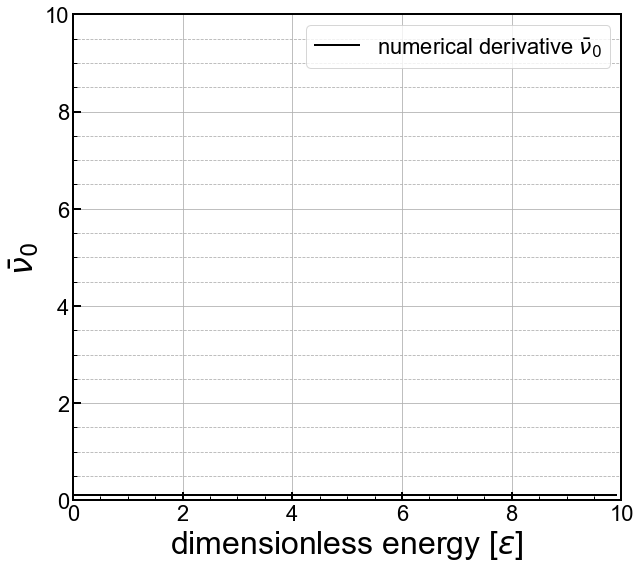

In [6]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



ax1.plot (sol.t, sol.y[0,:], 'k-', label='numerical derivative $\\bar{\\nu}_0$')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.001, 10)
ax1.set_ylim(0.001,10)
ax1.set_xlabel('dimensionless energy [$\epsilon$]',**axis_font)
ax1.set_ylabel('$\\bar{\\nu}_0$',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
plt.show()

In [7]:
#now have to try to figure out the RHS by integration

barnu_1 = inter.InterpolatedUnivariateSpline (sol.t, sol.y[0,:], k=3)
integrand = lambda t,e: (1/(2*t**(3/2)))*flind(t**(1/2))*(barnu_1(e-(t/e))-barnu_1(e)+barnu_1(t/e))
rhs1 = lambda e: integrate.quad(lambda t: integrand(t,e), 1e-3, e**2,epsrel=0.001)[0]

print(rhs1(1))

1.2318308316923203


In [8]:
#now try to solve diffeq on the next iteration 

f = lambda t,y: func(t,y,rhs1)

sol = integrate.solve_ivp(f,(xmin,xmax),y0,t_eval=T)

print(sol.status)
print(sol.success)

print(sol)

0
True
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
       6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
       1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
       1.801e+00, 1.901e+00, 2.001e+00, 2.101e+00, 2.201e+00, 2.301e+00,
       2.401e+00, 2.501e+00, 2.601e+00, 2.701e+00, 2.801e+00, 2.901e+00,
       3.001e+00, 3.101e+00, 3.201e+00, 3.301e+00, 3.401e+00, 3.501e+00,
       3.601e+00, 3.701e+00, 3.801e+00, 3.901e+00, 4.001e+00, 4.101e+00,
       4.201e+00, 4.301e+00, 4.401e+00, 4.501e+00, 4.601e+00, 4.701e+00,
       4.801e+00, 4.901e+00, 5.001e+00, 5.101e+00, 5.201e+00, 5.301e+00,
       5.401e+00, 5.501e+00, 5.601e+00, 5.701e+00, 5.801e+00, 5.901e+00,
       6.001e+00, 6.101e+00, 6.201e+00, 6.301e+00, 6.401e+00, 6.501e+00,
       6.601

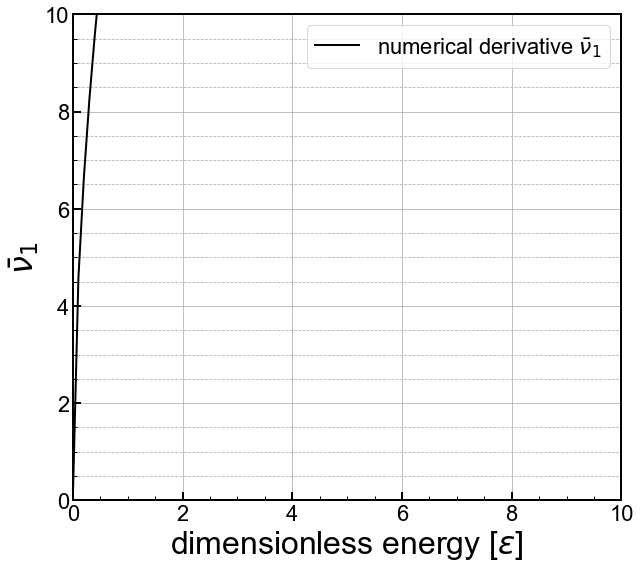

In [9]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



ax1.plot (sol.t, sol.y[0,:], 'k-', label='numerical derivative $\\bar{\\nu}_1$')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.001, 10)
ax1.set_ylim(0.001,10)
ax1.set_xlabel('dimensionless energy [$\epsilon$]',**axis_font)
ax1.set_ylabel('$\\bar{\\nu}_1$',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
plt.show()

In [10]:
#now have to try to figure out the RHS by integration

a = 0.2
barnu_2 = lambda x: a*inter.InterpolatedUnivariateSpline (sol.t, sol.y[0,:], k=3)(x) + (1-a)*barnu_1(x)
integrand = lambda t,e: (1/(2*t**(3/2)))*flind(t**(1/2))*(barnu_2(e-(t/e))-barnu_2(e)+barnu_2(t/e))
rhs2 = lambda e: integrate.quad(lambda t: integrand(t,e), 1e-3, e**2,epsrel=0.001)[0]

print(rhs2(1))

3.017493134340642


In [11]:
f = lambda t,y: func(t,y,rhs2)

sol = integrate.solve_ivp(f,(xmin,xmax),y0,t_eval=T)

print(sol.status)
print(sol.success)

print(sol)

/home/phys/villaa/python/anaconda3/envs/py365/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


0
True
  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 152
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
       6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00, 1.101e+00,
       1.201e+00, 1.301e+00, 1.401e+00, 1.501e+00, 1.601e+00, 1.701e+00,
       1.801e+00, 1.901e+00, 2.001e+00, 2.101e+00, 2.201e+00, 2.301e+00,
       2.401e+00, 2.501e+00, 2.601e+00, 2.701e+00, 2.801e+00, 2.901e+00,
       3.001e+00, 3.101e+00, 3.201e+00, 3.301e+00, 3.401e+00, 3.501e+00,
       3.601e+00, 3.701e+00, 3.801e+00, 3.901e+00, 4.001e+00, 4.101e+00,
       4.201e+00, 4.301e+00, 4.401e+00, 4.501e+00, 4.601e+00, 4.701e+00,
       4.801e+00, 4.901e+00, 5.001e+00, 5.101e+00, 5.201e+00, 5.301e+00,
       5.401e+00, 5.501e+00, 5.601e+00, 5.701e+00, 5.801e+00, 5.901e+00,
       6.001e+00, 6.101e+00, 6.201e+00, 6.301e+00, 6.401e+00, 6.501e+00,
       6.60

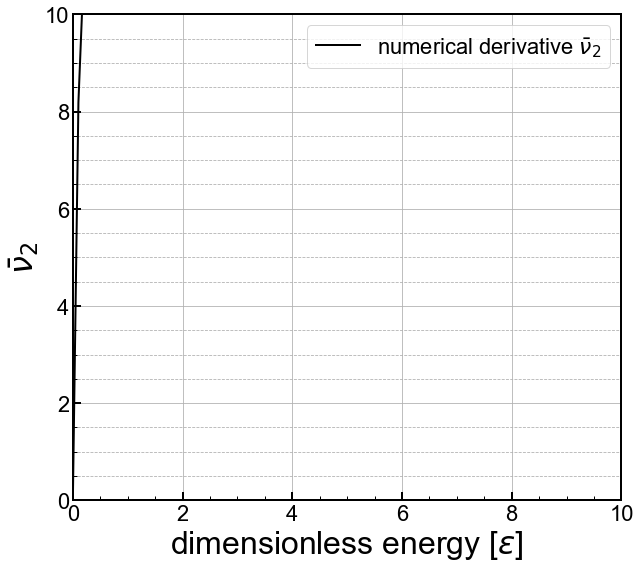

In [13]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes



ax1.plot (sol.t, sol.y[0,:], 'k-', label='numerical derivative $\\bar{\\nu}_2$')



ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.001, 10)
ax1.set_ylim(0.001,10)
ax1.set_xlabel('dimensionless energy [$\epsilon$]',**axis_font)
ax1.set_ylabel('$\\bar{\\nu}_2$',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figures.png')
plt.show()